<a href="https://colab.research.google.com/github/kumarsinghashu/Retail-sales-prediction/blob/main/Retail_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

#<b/>Project Type - Regression</b>


#<b/>Contribution - Individual
###Name - Ashutosh Kumar Singh</b>

#<b/>Project Summary -</b>

Predicting sales for a major store chain like Rossmann involves leveraging data analysis, machine learning techniques, and understanding various factors influencing sales. Here's a summary of the steps and components typically involved in a sales prediction project for Rossmann or a similar retail chain:

1. **Understanding the Problem**: The goal is to predict future sales for individual Rossmann stores based on historical data. This involves considering variables such as promotions, competition, holidays, seasonality, store characteristics, etc.

2. **Data Collection**: Gathering historical sales data, store information, product details, promotional activities, external factors like economic conditions, weather data, and any other relevant information that could impact sales.

3. **Data Preprocessing and Exploratory Data Analysis (EDA)**:
   - Cleaning and preprocessing the data, handling missing values, outliers, and data normalization.
   - Exploring relationships between different variables through visualizations and statistical analysis to understand correlations and patterns.

4. **Feature Engineering**: Creating new features or transforming existing ones to improve the model's predictive power. This could involve creating lag features, aggregating data over time periods, extracting information from timestamps, etc.

5. **Model Selection and Training**:
   - Choosing appropriate machine learning algorithms (e.g., linear regression, decision trees, random forests, gradient boosting, neural networks) based on the problem and data characteristics.
   - Splitting the data into training and validation sets, tuning hyperparameters, and training the models.

6. **Validation and Evaluation**:
   - Evaluating models using appropriate metrics (e.g., RMSE, MAE for regression) on the validation set to understand their performance.
   - Iteratively refining models by adjusting parameters or trying different algorithms to improve accuracy.

7. **Deployment and Monitoring**:
   - Implementing the model to predict sales for new data or future time periods.
   - Continuously monitoring the model's performance and retraining as necessary to account for changing trends or variables affecting sales.

8. **Interpretation and Reporting**:
   - Interpreting the model results to understand which factors have the most significant impact on sales predictions.
   - Presenting findings, insights, and predictions to stakeholders in an understandable format (reports, dashboards, presentations).

9. **Integration and Implementation**:
   - Integrating the model into Rossmann's existing systems or workflows to make data-driven sales predictions an integral part of their decision-making process.

This project aims to provide Rossmann with accurate sales predictions, enabling better inventory management, resource allocation, and strategic decision-making to maximize revenue and optimize store performance.

Please note that the specifics of such a project can vary based on available data, business requirements, and the level of complexity desired in the predictive model.

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Define the directory path  files are located
file_directory = '/content/drive/MyDrive/Retail sales prediction/'

# Read the Rossmann Stores Data
rossmann_df = pd.read_csv(file_directory + 'Rossmann Stores Data.csv')

# Read the store data
store_df = pd.read_csv(file_directory + 'store (1).csv')


<ipython-input-4-f12df2560d18>:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossmann_df = pd.read_csv(file_directory + 'Rossmann Stores Data.csv')


# <b>Exploring and Understanding more about data</b>
* ## The data set contains 1017209 rows and 9 columns.

In [ ]:
#Total no of rows
rossmann_df.shape

(1017209, 9)

In [ ]:
#Top rows
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
#Bottom rows
rossmann_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
#Checking data set in berif
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


<b/>The 'store' dataset comprises 1115 entries (or rows) and includes 10 different attributes or features.</b>

## Looking for Nan values in Store csv file

In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are missing values (NaN) in several columns: **'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'PromoInterval', 'Promo2SinceWeek', 'Promo2SinceYear', and only a few null values in 'CompetitionDistance'**. We need to address and clean these missing values in the dataset.

### 1. CompetitionDistance

In [ ]:
store_df[pd.isnull(store_df.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


So, we can fill these three values with many ways such as 0 or mean or mode or median. We decided to fill with it Median.

In [ ]:
## code for replacing Nan values in CompetitionDistance with mode.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

#<b/>2. 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'</b>

Given the limited information available for this dataset, we've noticed that when the 'Promo2' value is zero, there are NaN (missing) values in columns such as 'PromoInterval', 'Promo2SinceWeek', and others. This indicates that stores not participating in promotions have null values in these columns. Therefore, the most suitable approach to fill these features is to assign a value of zero.

In [ ]:
## code for replacing Nan values with 0.

store_new = store_df.copy()

## Replacing Nan values with 0 in CompetitionOpenSinceMonth
store_new['CompetitionOpenSinceMonth'] = store_new['CompetitionOpenSinceMonth'].fillna(0)

## Replacing Nan values with 0 in CompetitionOpenSinceYear
store_new['CompetitionOpenSinceYear'] = store_new['CompetitionOpenSinceYear'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceWeek
store_new['Promo2SinceWeek'] = store_new['Promo2SinceWeek'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceYear
store_new['Promo2SinceYear'] = store_new['Promo2SinceYear'].fillna(0)

## Replacing Nan values with 0 in PromoInterval
store_new['PromoInterval'] = store_new['PromoInterval'].fillna(0)

## Now checking Nan values
store_new.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#<b/>Merge the Rossmann_df and Store_df csv by column 'Store' as in both csv Store column is common.</b>

In [ ]:
final1 = pd.merge(rossmann_df, store_new, on='Store', how='left')
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
final1.shape

(1017209, 18)

#<b/>Changing different dtypes to int type.</b>

In [ ]:
# code for changing StateHoliday dtype from object to int.
final1.loc[final1['StateHoliday'] == '0', 'StateHoliday'] = 0
final1.loc[final1['StateHoliday'] == 'a', 'StateHoliday'] = 1
final1.loc[final1['StateHoliday'] == 'b', 'StateHoliday'] = 2
final1.loc[final1['StateHoliday'] == 'c', 'StateHoliday'] = 3
final1['StateHoliday'] = final1['StateHoliday'].astype(int, copy=False)

print('levels :', final1['StateHoliday'].unique(), '; data type :', final1['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int64


In [ ]:
# code for changing Assortment dtype from object to int.
final1.loc[final1['Assortment'] == 'a', 'Assortment'] = 0
final1.loc[final1['Assortment'] == 'b', 'Assortment'] = 1
final1.loc[final1['Assortment'] == 'c', 'Assortment'] = 2
final1['Assortment'] = final1['Assortment'].astype(int, copy=False)

print('levels :', final1['Assortment'].unique(), '; data type :', final1['Assortment'].dtype)

levels : [0 2 1] ; data type : int64


In [ ]:
# code for changing StoreType dtype from object to int.
final1.loc[final1['StoreType'] == 'a', 'StoreType'] = 0
final1.loc[final1['StoreType'] == 'b', 'StoreType'] = 1
final1.loc[final1['StoreType'] == 'c', 'StoreType'] = 2
final1.loc[final1['StoreType'] == 'd', 'StoreType'] = 3
final1['StoreType'] = final1['StoreType'].astype(int, copy=False)

print('levels :', final1['StoreType'].unique(), '; data type :', final1['StoreType'].dtype)

levels : [2 0 3 1] ; data type : int64


In [ ]:
# code for changing format of date from object to datetime
final1['Date'] = pd.to_datetime(final1['Date'], format= '%Y-%m-%d')

In [ ]:
final1['CompetitionOpenSinceYear']= final1['CompetitionOpenSinceYear'].astype(int)
final1['Promo2SinceYear']= final1['Promo2SinceYear'].astype(int)

In [ ]:
final1['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final1['Date']).month

In [ ]:
final1['CompetitionDistance']= final1['CompetitionDistance'].astype(int)
final1['Promo2SinceWeek']= final1['Promo2SinceWeek'].astype(int)

#<b/>checking dtypes of columns</b>

In [ ]:
final1.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                   int64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                        object
dtype: object

#<b/>Exploratory Data Analysis</b>

In [ ]:
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


In [ ]:
final1.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5422.02,5.85,1370.17,0.50,11.65,1007.01
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7706.92,3.33,935.36,0.50,15.32,1005.88
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,1.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,710.00,3.00,0.00,0.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2325.00,6.00,2006.00,1.00,1.00,2009.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,8.00,2011.00,1.00,22.00,2012.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


In [ ]:
final1.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,0,1900,1,2014,1,31,2013,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2,2,1880,1,2006,0,0,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,2,9260,1,0,0,0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,2,870,1,0,0,0,0,0
1017208,1115,2,2013-01-01,0,0,0,0,1,1,3,2,5350,1,0,1,22,2012,"Mar,Jun,Sept,Dec"


In [ ]:
final1.info

<bound method DataFrame.info of          Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

         StateHoliday  SchoolHoliday  StoreType  Assortment  \
0                   0              1          2     

#<b/>Our target variable is 'Sales,' so it's essential to examine its distribution.</b>

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

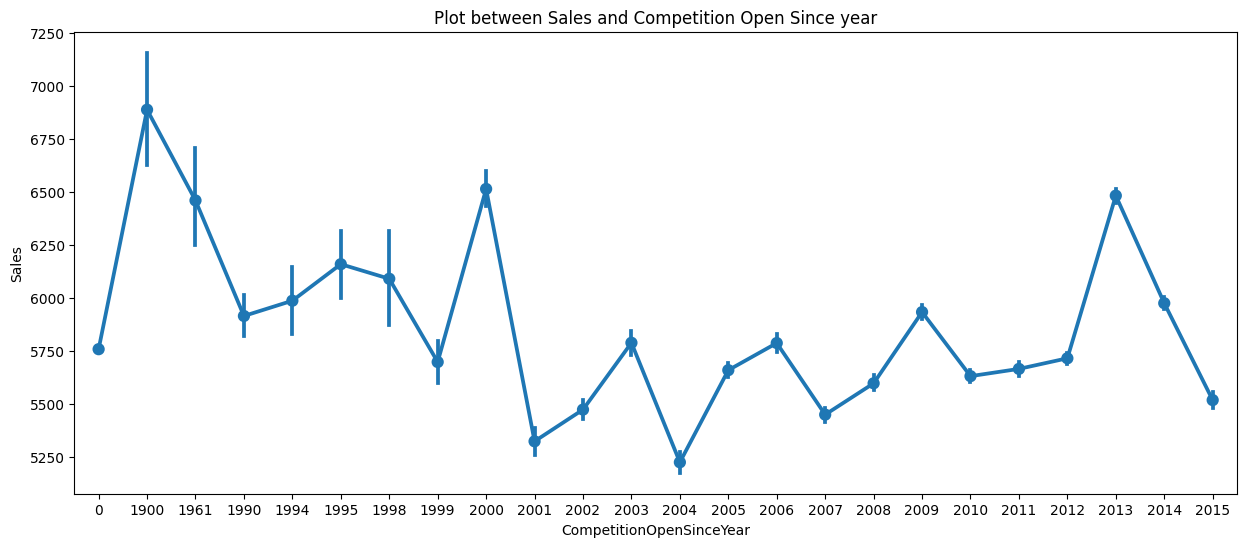

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=final1)
plt.title('Plot between Sales and Competition Open Since year')

Based on the plot, it's evident that sales were high during the year 1900, likely due to a smaller number of Rossmann-operated stores, resulting in less competition. However, as the years passed, the number of stores increased, indicating a rise in competition, subsequently leading to a decline in sales.

Text(0.5, 1.0, 'Plot between Sales and Promo2 Since year')

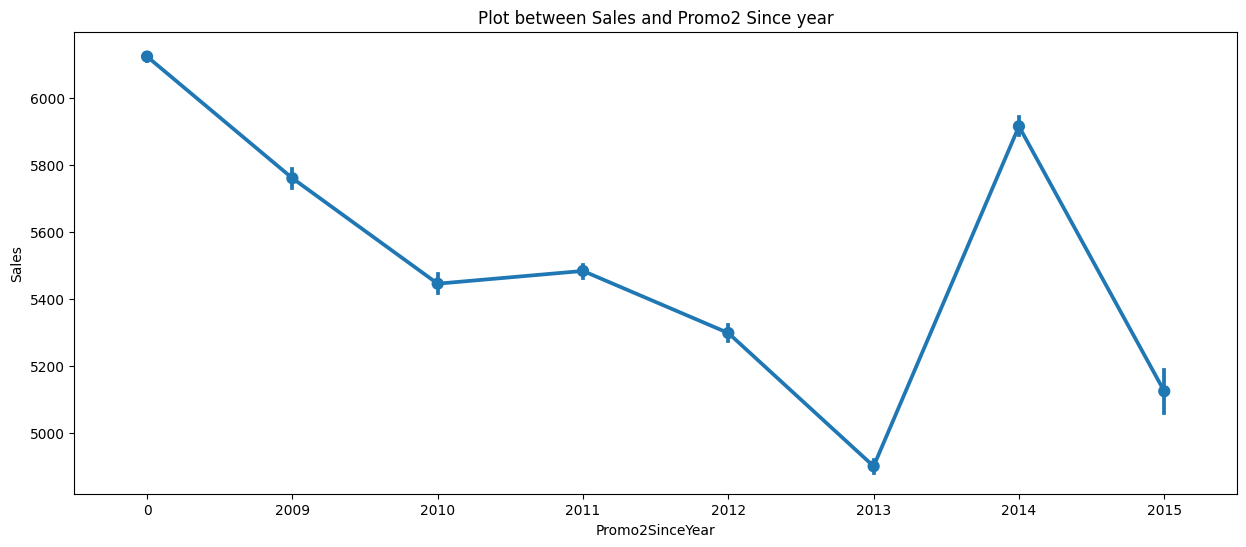

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=final1)
plt.title('Plot between Sales and Promo2 Since year')

The plot depicting Sales against 'Promo2SinceYear' illustrates the impact of ongoing promotions on store sales. This dataset spans from 2009 to 2015. It's noticeable that Promo2 has a substantial positive effect on sales. However, in the year 2013, sales hit a minimum, and similarly, in 2012 and 2015, sales figures are notably low.

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since Month')

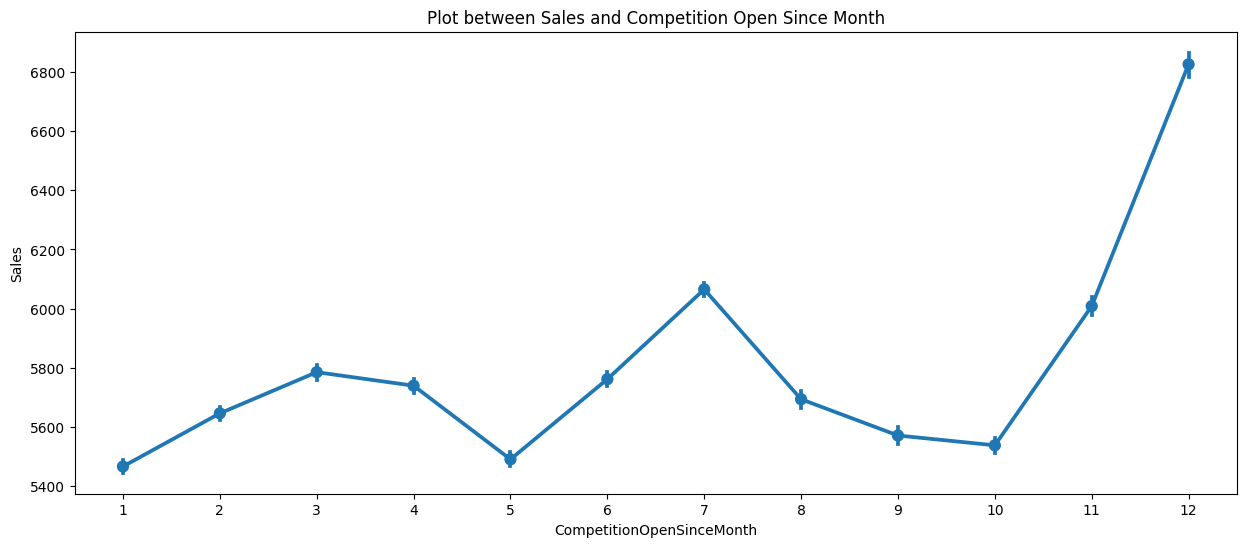

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=final1)
plt.title('Plot between Sales and Competition Open Since Month')

The correlation between 'CompetitionOpenSinceMonth' and Sales elucidates the sales trends across each month of a year. The data indicates a substantial surge in sales following the month of November. It's evident that during December, owing to the Christmas Eve and New Year celebrations, there is a significant spike in purchases. Consequently, the sales at Rossmann stores soar during December

Text(0.5, 1.0, 'Plot between Sales and Day of Week')

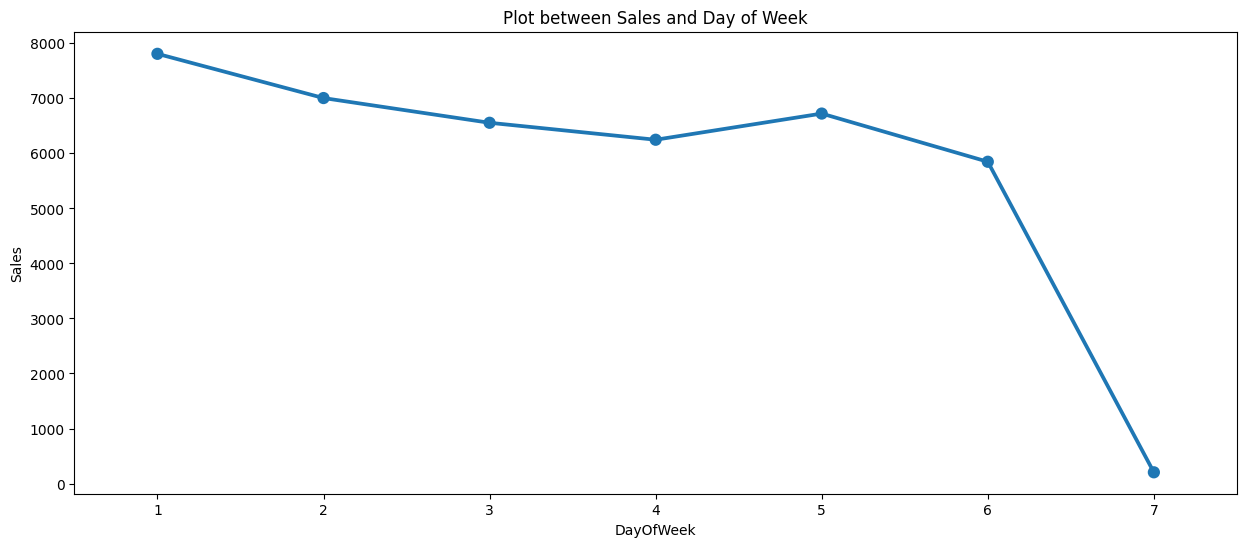

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=final1)
plt.title('Plot between Sales and Day of Week')

The sales plotted against the days of the week reveal that the highest sales occur on Monday, gradually decreasing until the sixth day of the week, which is Saturday. Moreover, it's evident that sales on Sunday are almost negligible, likely due to the closure of a majority of stores on that day.

#<b/>Plot between Dayof Week and Open & promo.</b>

Text(0.5, 1.0, 'Store Daily Open Countplot')

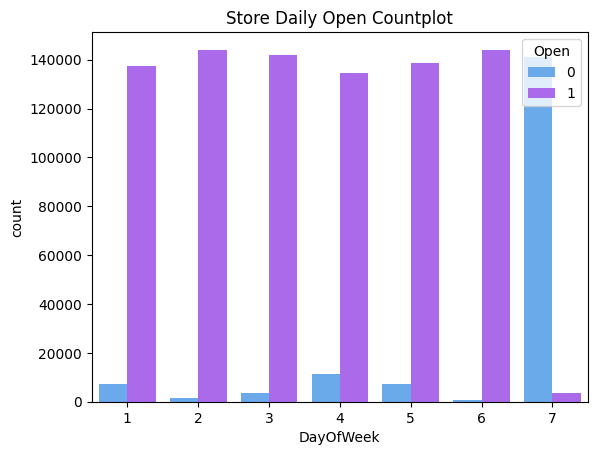

In [ ]:
sns.countplot(x= 'DayOfWeek', hue='Open', data= final1, palette='cool')
plt.title('Store Daily Open Countplot')

Text(0.5, 1.0, 'Store Daily Promo Countplot')

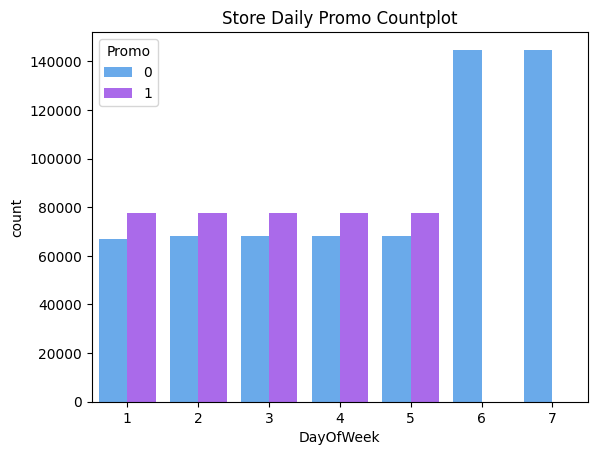

In [ ]:
sns.countplot(x= 'DayOfWeek', hue='Promo', data= final1, palette='cool')
plt.title('Store Daily Promo Countplot')

#<b/>BoxPlot of sales between Assortment and store type</b>

Text(0.5, 1.0, 'Boxplot For Sales Values')

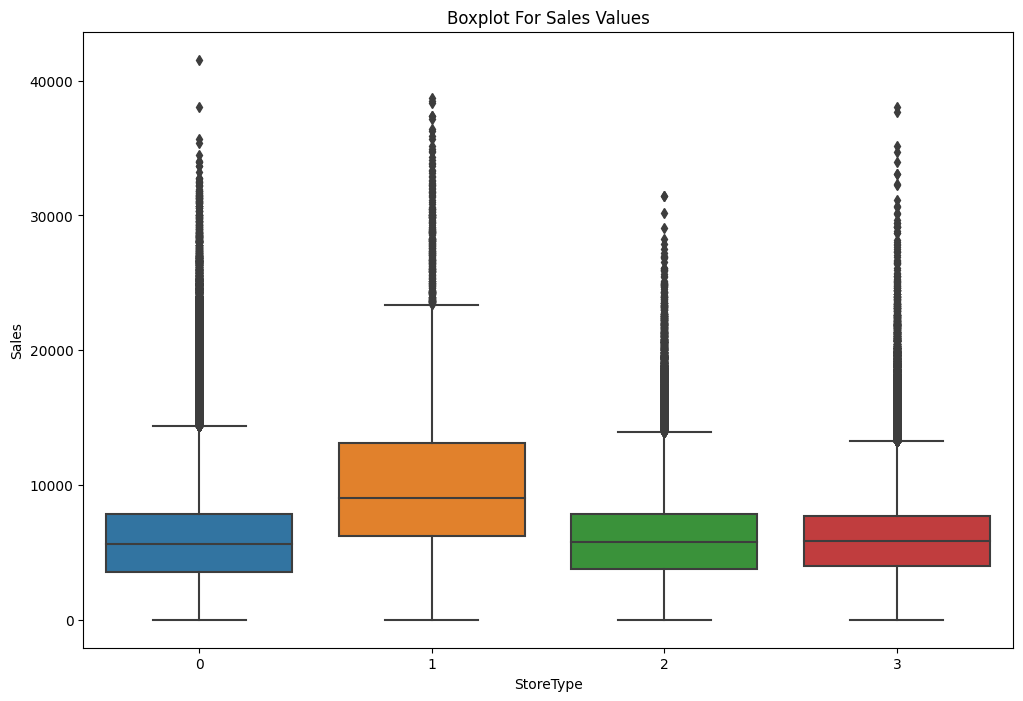

In [ ]:
plt.figure(figsize=(12,8))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=final1)
plt.title('Boxplot For Sales Values')

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment Level')

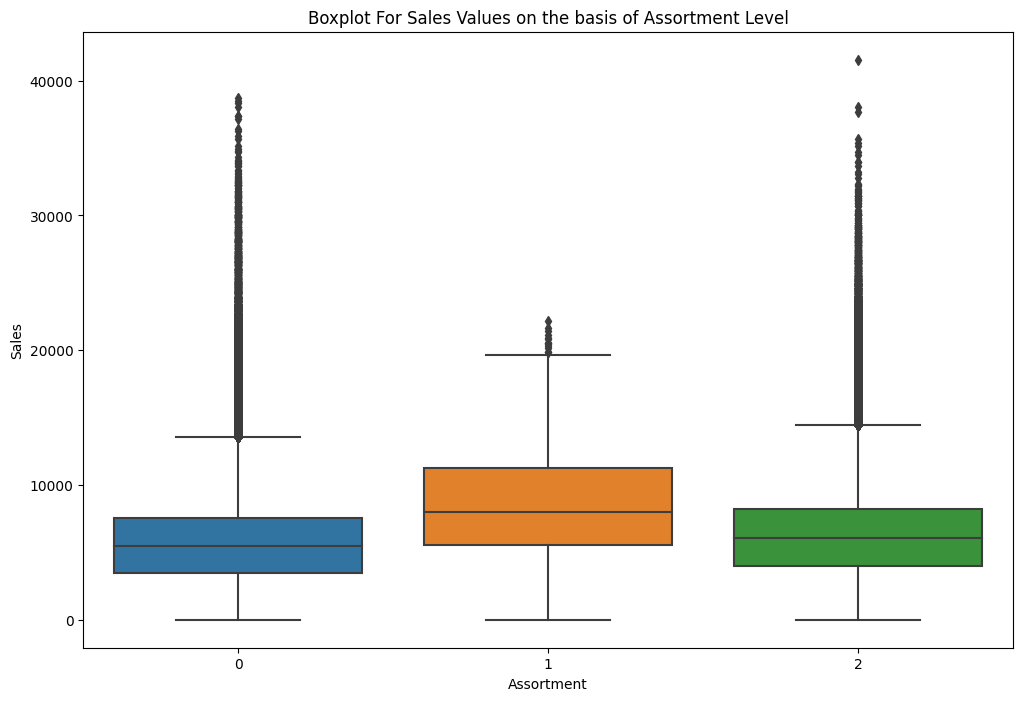

In [ ]:
plt.figure(figsize=(12, 8))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=final1)
plt.title('Boxplot For Sales Values on the basis of Assortment Level')

#<b/>Promo</b>

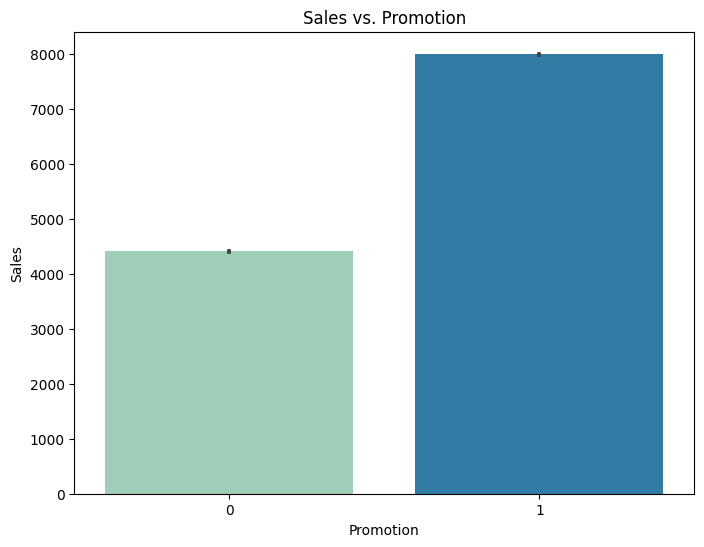

In [ ]:


plt.figure(figsize=(8, 6))
# Creating a bar plot with Seaborn
promo_sales = sns.barplot(x="Promo", y="Sales", data=final1, palette='YlGnBu')
plt.title('Sales vs. Promotion')
plt.xlabel('Promotion')
plt.ylabel('Sales')
plt.show()


A bar plot depicting the relationship between promotion and sales reveals the impact of promotions on sales. Here, 0 represents stores that did not opt for promotions, while 1 represents stores that did. It's evident that stores participating in promotions exhibit higher sales compared to those that did not partake in promotional activities.

#<b/>Store Type</b>



In [ ]:
merged_df = pd.merge(rossmann_df, store_new, on='Store', how='left')

<ipython-input-38-bfdac59f9466>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
<ipython-input-38-bfdac59f9466>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
<ipython-input-38-bfdac59f9466>:9: FutureWarning: The default value of numeric_only in DataF

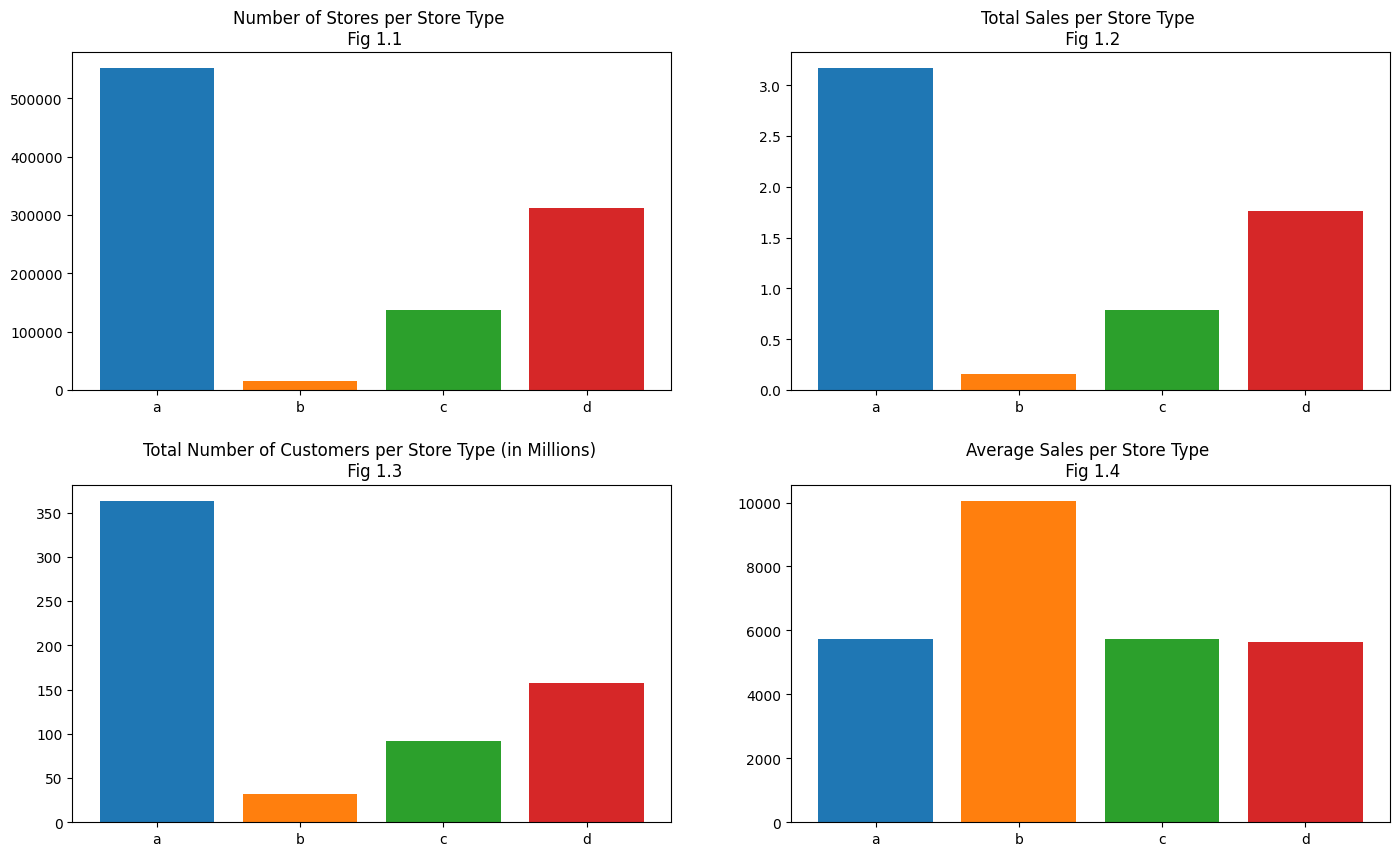

In [ ]:
import itertools
fig, axes = plt.subplots(2, 2,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
axes[0,0].bar(merged_df.groupby(by="StoreType").count().Store.index ,merged_df.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type \n Fig 1.2")
axes[1,0].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,1].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Sales per Store Type \n Fig 1.4")
plt.show()

Within this training set, Storetype A is observed to have the largest count of branches, sales, and customers among the four different store types. However, this does not necessarily indicate that it is the top-performing Storetype.

Upon closer examination of the average sales and the number of customers, it becomes apparent that Storetype B actually demonstrates the highest average sales and the highest average number of customers.

#<b/>StateHoliday and SchoolHoliday</b>

Sales during State Holiday

0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None

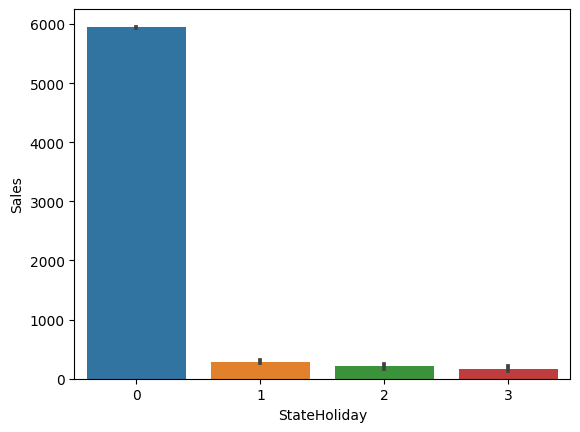

In [ ]:
stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data=final1)

Sales during school holiday

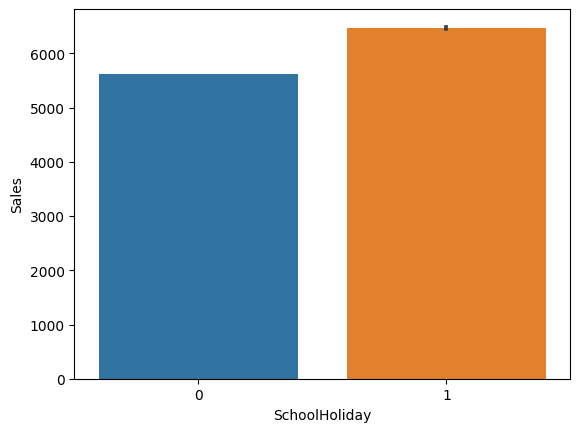

In [ ]:
schoolholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=final1)

It's noticeable that the majority of stores remained closed during state holidays and holidays in general. However, intriguingly, a higher number of stores were open during school holidays compared to state holidays. Equally important is the observation that stores operating during school holidays experienced higher sales compared to their regular performance.

#<b/>Assortments</b>

As we cited in the description, assortments have three types and each store has a defined type and assortment type:

1.a means basic things

2.b means extra things

3.c means extended things so the highest variety of products.

StoreType  Assortment
a          a             346389
           c             205238
b          a               6594
           b               8294
           c                942
c          a              70878
           c              65962
d          a             113584
           c             199328
Name: Assortment, dtype: int64

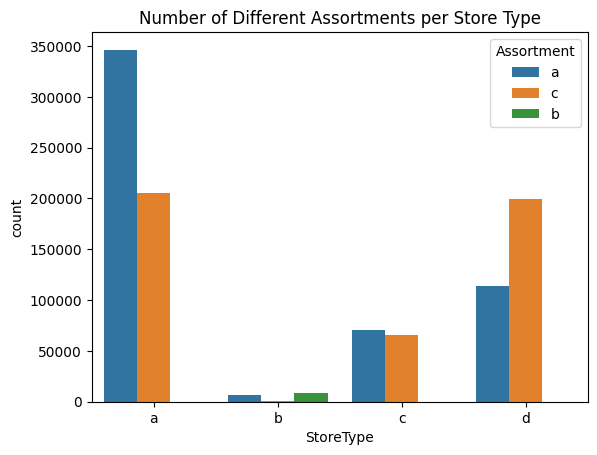

In [ ]:
Storetype_Assortment = sns.countplot(x="StoreType",hue="Assortment",order=["a","b","c","d"], data=merged_df,palette=sns.color_palette(n_colors=3)).set_title("Number of Different Assortments per Store Type")
merged_df.groupby(by=["StoreType","Assortment"]).Assortment.count()

It's evident from the data that the majority of stores fall under either 'a' assortment type or 'c' assortment type. Surprisingly, StoreType 'd,' which boasts the highest average Sales per customer, primarily consists of 'c' assortment type stores. This correlation likely contributes to the notably high average in Sales per customer. Having a variety in stores typically amplifies customers' spending patterns.

#<b/>Feature Engineering</b>
##<b/>Correlation</b>

In [ ]:
numeric_features = ['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Promo2SinceWeek',
                    'CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
                    'Promo2','Promo2SinceWeek','Promo2SinceYear']

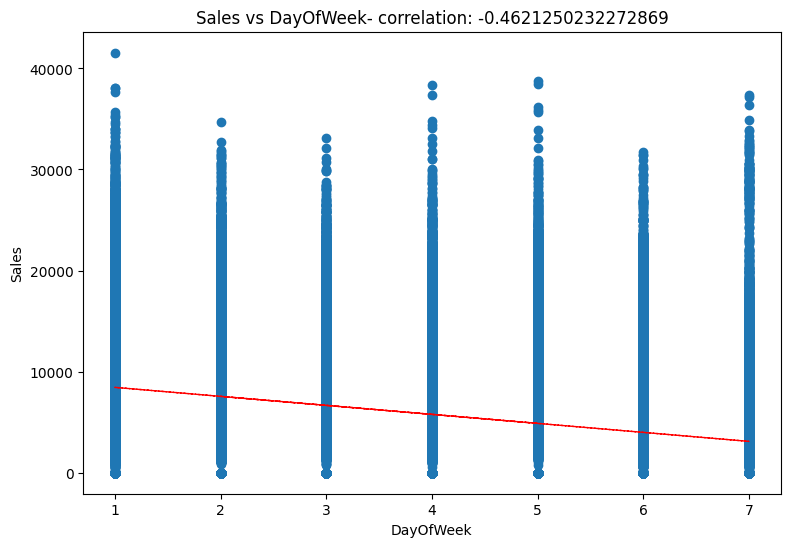

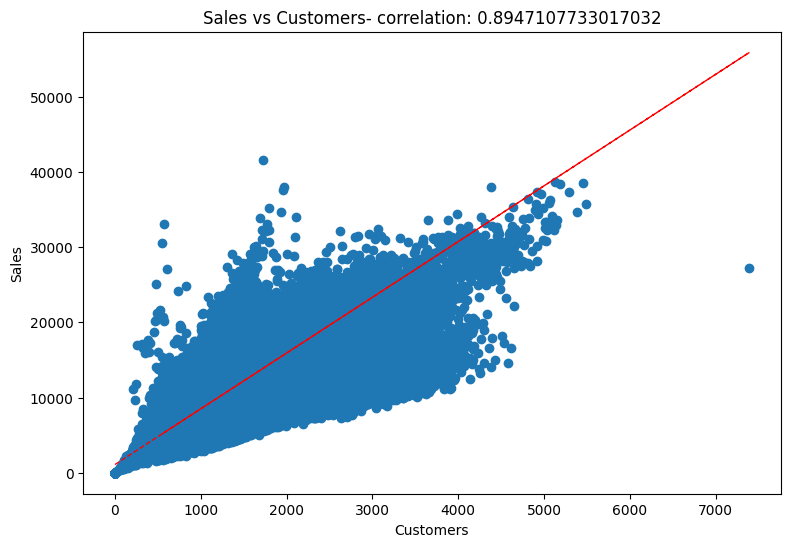

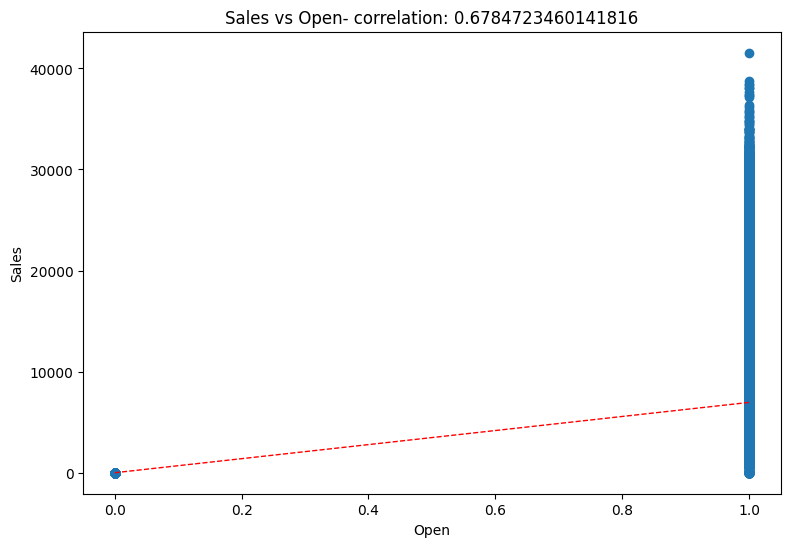

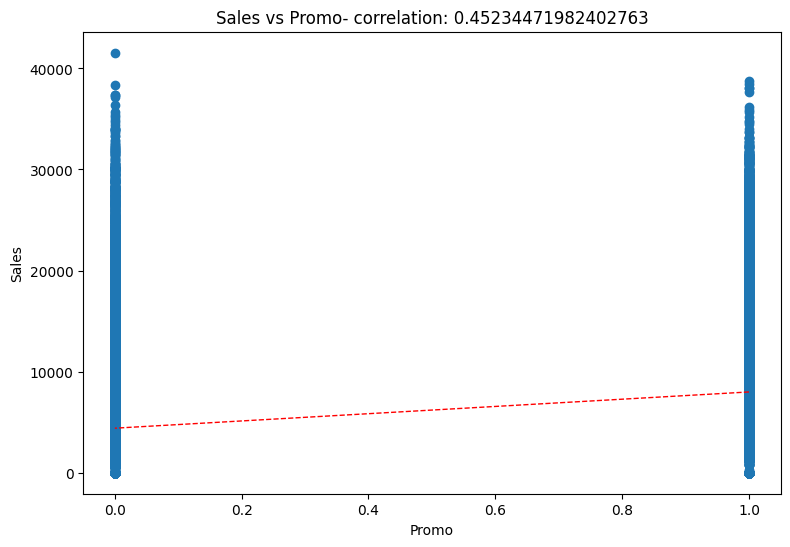

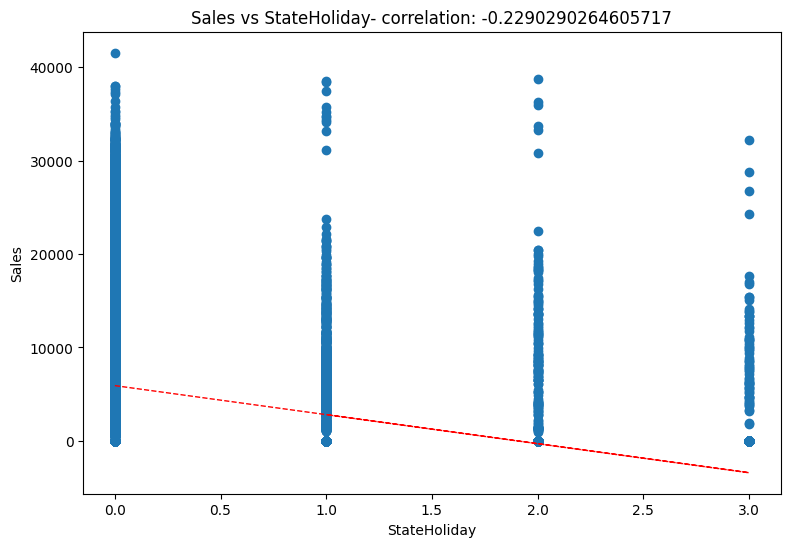

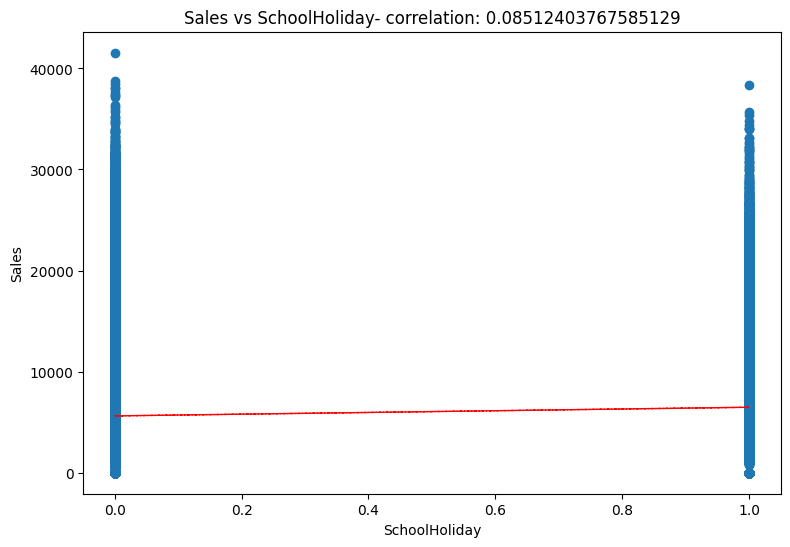

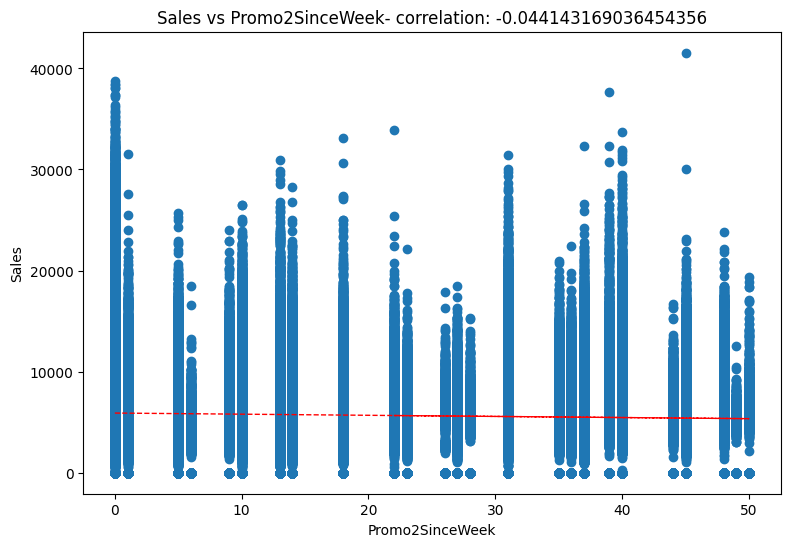

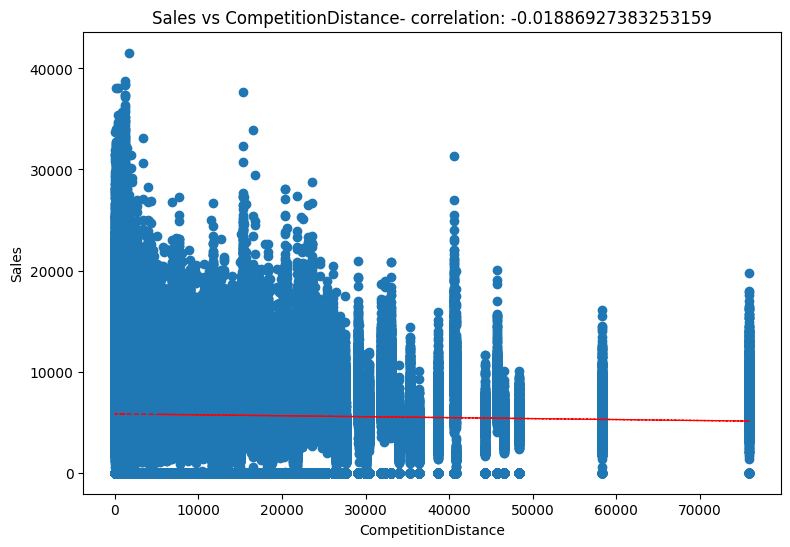

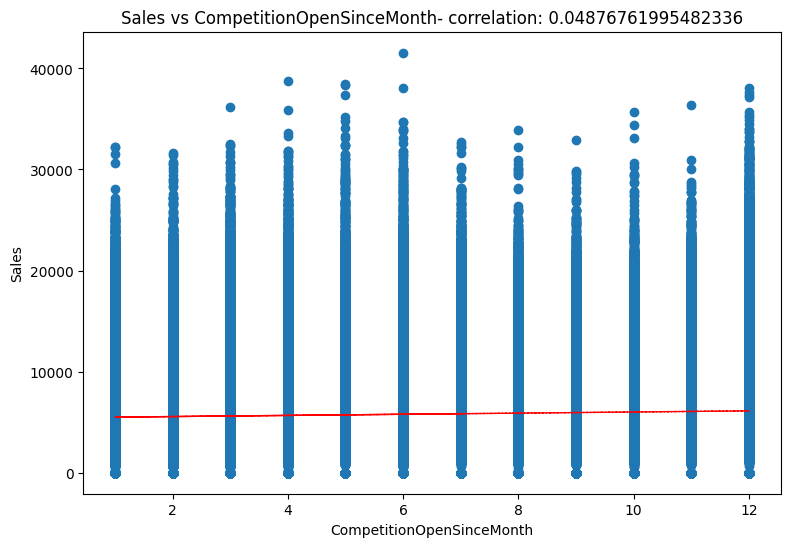

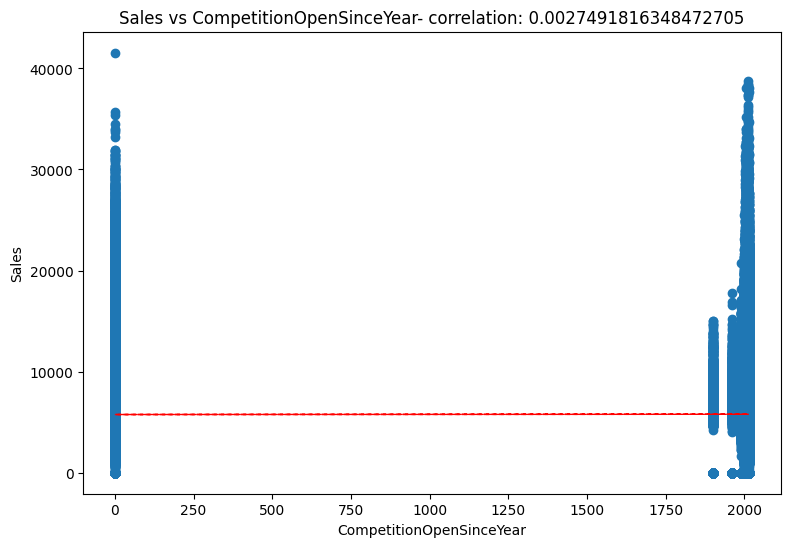

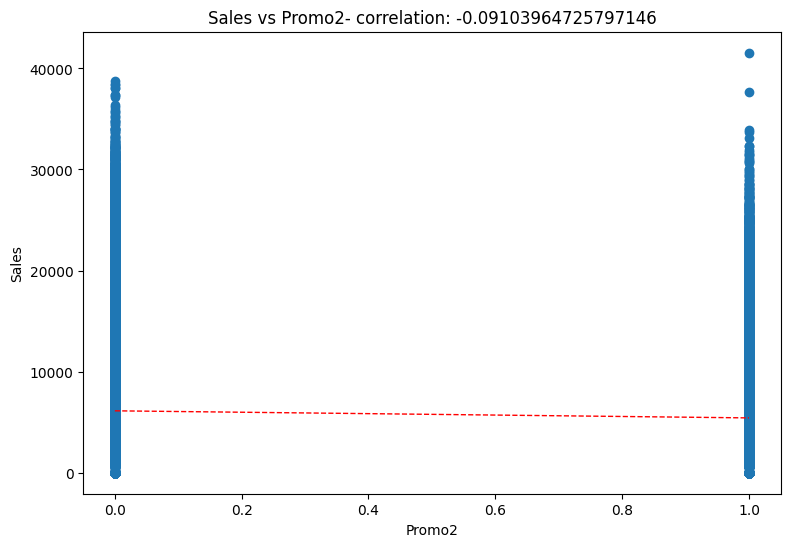

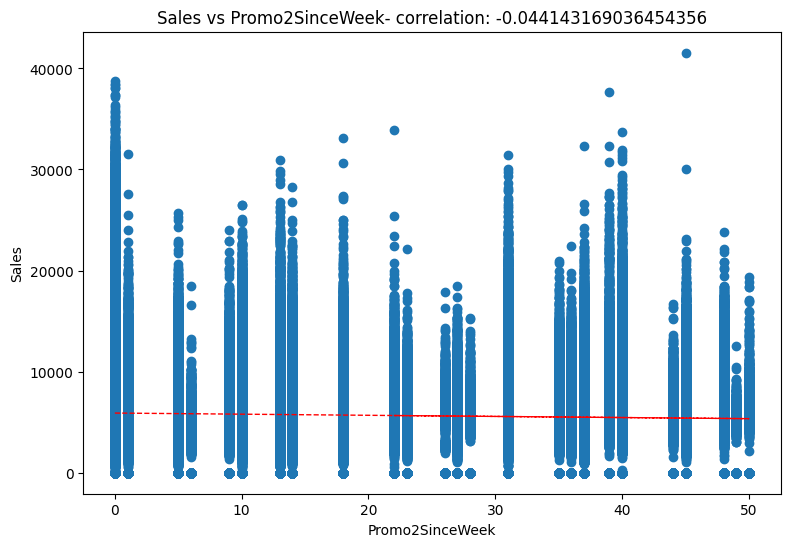

In [ ]:
for col in numeric_features[0:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = final1[col]
    label = final1['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(final1[col], final1['Sales'], 1)
    y_hat = np.poly1d(z)(final1[col])

    plt.plot(final1[col], y_hat, "r--", lw=1)

plt.show()

<ipython-input-44-1b0f911ba5d4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = final1.corr()


<Axes: >

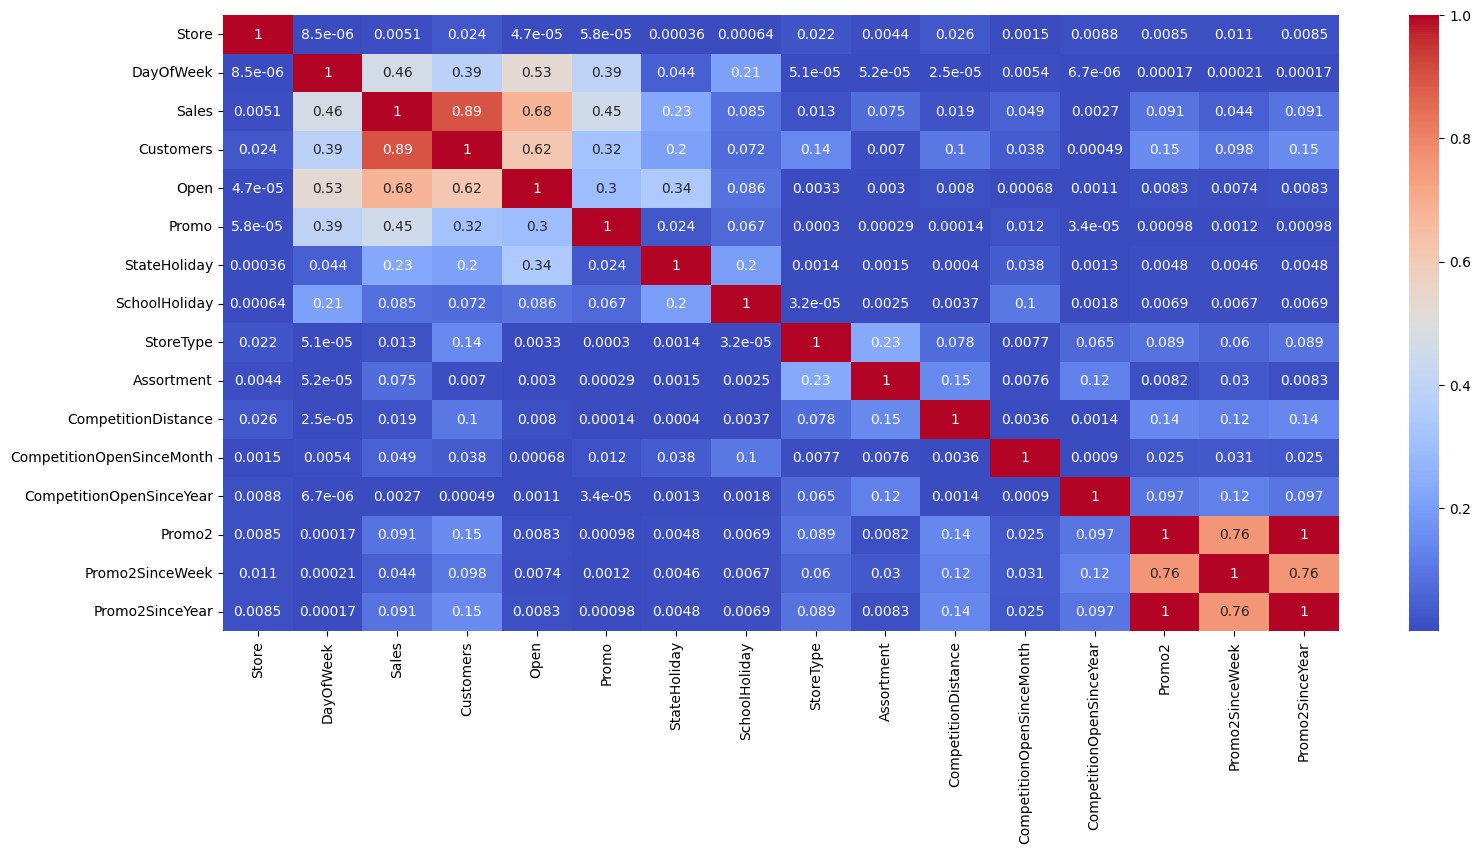

In [ ]:
 ## Correlation
plt.figure(figsize=(18,8))
correlation = final1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##<b/>Multicollinearity</b>

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(final1[[i for i in final1.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,3.698849e+00
1,DayOfWeek,4.105225e+00
2,Customers,5.237282e+00
3,Open,9.376848e+00
4,Promo,1.917234e+00
5,StateHoliday,1.187994e+00
6,SchoolHoliday,1.330849e+00
7,StoreType,1.940349e+00
8,Assortment,2.045194e+00
9,CompetitionDistance,1.591292e+00


**We've observed a significant issue of multicollinearity with columns such as 'Promo2SinceYear', prompting our decision to remove/drop it.**

In [ ]:
calc_vif(final1[[i for i in final1.describe().columns if i not in ['Sales','Promo2SinceYear']]])

,variables,VIF
0,Store,3.696403
1,DayOfWeek,4.104888
2,Customers,5.236788
3,Open,9.375773
4,Promo,1.917192
5,StateHoliday,1.187994
6,SchoolHoliday,1.330832
7,StoreType,1.934515
8,Assortment,2.039582
9,CompetitionDistance,1.584854


**For each feature, the Variance Inflation Factor (VIF) values are below 10, which appears satisfactory.**

#<b/>Analysis on Sales - Dependent variable</b>

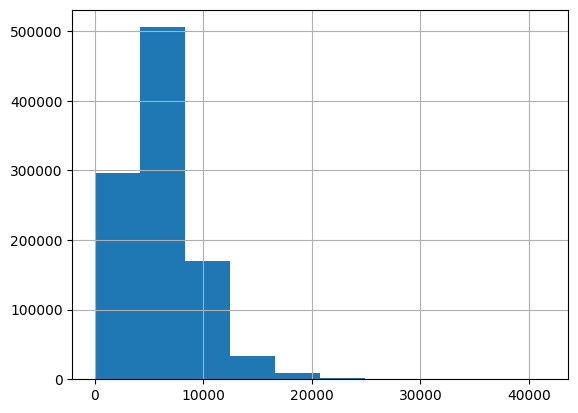

In [ ]:
pd.Series(final1['Sales']).hist()
plt.show()

**Now conducting an assessment for instances where the number of sales equals zero.**

In [ ]:
final1[(final1.Open == 0) & (final1.Sales == 0)].count()[0]

172817

**We've identified that the stores were temporarily closed for refurbishment approximately 172,817 times. The optimal approach in this scenario is to exclude these closed stores from the dataset to avoid the models being trained on them, which might lead to misleading insights.**

In [ ]:
new_df = final1.drop(final1[(final1.Open == 0) & (final1.Sales == 0)].index)

In [ ]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


In [ ]:
new_df.shape

(844392, 18)

**The categorical feature "PromoInterval" will be converted into dummy variables for analysis and modeling purposes.**

In [ ]:
new_df = pd.get_dummies(new_df, columns=['PromoInterval'])

In [ ]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


#<b/>MODEL TRAINING</b>

In [ ]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

#<b/>MODEL 1 (excluding rows which has sales =0)</b>
We were confused about whether to include rows where sales value is 0.So first we built a model excluding sales value and then including those values

In [ ]:
# defining dependent variable
dependent_variables = 'Sales'

# defining independent variable
independent_variables = list(new_df.columns.drop(['Promo2SinceYear','Date','Sales']))

In [ ]:
independent_variables

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [ ]:
# Create the data of independent variables
X = new_df[independent_variables].values

# Create the data of dependent variable
y = new_df[dependent_variables].values

In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675513, 18)
(168879, 18)


#<b/>Linear Regression</b>

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.7635206721712489

In [ ]:
reg.coef_

array([-1.61198393e-01, -6.85494360e+01,  6.35538315e+00, -4.26503277e-12,
        1.29641730e+03, -1.28111956e+03,  3.62446443e+01,  2.76683058e+02,
        2.22275066e+02,  2.89088547e-02,  2.99506182e+01,  8.42814871e-02,
       -4.31749840e+01,  1.25018997e+01,  4.31749840e+01,  3.14329207e+01,
        1.38938365e+02, -2.13546269e+02])

In [ ]:
reg.intercept_

699.0967159057836

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([5324.52055538, 4849.53474672, 7238.83092913, ..., 4097.96470899,
       7772.06170472, 5367.78459861])

In [ ]:
y_pred_train = reg.predict(X_train)
y_pred_train

array([5490.38320365, 6804.10566331, 6698.58966523, ..., 7913.583262  ,
       6883.58642448, 6123.44589933])

In [ ]:
y_test

array([ 5495,  5472,  7969, ...,  2938, 10413,  5828])

In [ ]:
y_train

array([5409, 7339, 7807, ..., 4817, 6194, 5862])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2265482.0601440733
RMSE : 1505.151839564392


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

R2 : 0.7634832020041


#<b/>Lasso</b>

In [ ]:
L1 = Lasso(alpha = 0.2, max_iter=10000)

In [ ]:
L1.fit(X_train, y_train)

Lasso(alpha=0.2, max_iter=10000)

In [ ]:
y_pred_lasso = L1.predict(X_test)

In [ ]:
L1.score(X_test, y_test)

0.7634806392437031

In [ ]:
pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'pred'])

,actual,pred
0,5495,5325.566578
1,5472,4852.633900
2,7969,7238.801578
3,7384,6082.445661
4,13212,7828.577358
...,...,...
168874,16337,16397.542791
168875,9195,7061.771442
168876,2938,4100.387939
168877,10413,7773.380435


#<b/>Ridge</b>

In [ ]:
L2 = Ridge(alpha = 0.5)

In [ ]:
L2.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
L2.predict(X_test)

array([5324.52132743, 4849.53877333, 7238.83130418, ..., 4097.96761889,
       7772.05987742, 5367.78588992])

In [ ]:
L2.score(X_test, y_test)

0.7634831985598826

#<b/>Decision Tree</b>

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
y_train_dt = decision_tree.predict(X_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

# Calculate the mean of sales data

sales_mean = np.mean(y_test)
RMPSE = RMSE / sales_mean
print("RMPSE:", RMPSE)


r2 = r2_score(y_test, y_pred_dt)
print("R2 :" ,r2)

MSE : 2006455.1648935971
RMSE : 1416.4939692401083
RMPSE: 0.20381613579531518
R2 : 0.7905256637111533


#<b/>MODEL 2 (By taking whole Dataset)</b>

<b/>We use dummy variables for the column 'PromoInterval'</b>

In [ ]:
final1 = pd.get_dummies(final1, columns=['PromoInterval'])

In [ ]:
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


In [ ]:
final1.shape

(1017209, 21)

**We define dependent and independent variables and convert them into arrays.**

In [ ]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = final1.columns.drop(['Store', 'Promo2SinceYear','Date','Sales'])

In [ ]:
# Create the data of independent variables
U = final1[indep_var].values

# Create the dependent variable data
v = final1[dep_var].values

In [ ]:
final1[indep_var]

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,5,555,1,1,0,1,2,0,1270,7,2008,0,0,1,0,0,0
1,5,625,1,1,0,1,0,0,570,7,2007,1,13,0,0,1,0
2,5,821,1,1,0,1,0,0,14130,7,2006,1,14,0,0,1,0
3,5,1498,1,1,0,1,2,2,620,7,2009,0,0,1,0,0,0
4,5,559,1,1,0,1,0,0,29910,7,2015,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,1,1,0,0,1900,1,2014,1,31,0,0,1,0
1017205,2,0,0,0,1,1,2,2,1880,1,2006,0,0,1,0,0,0
1017206,2,0,0,0,1,1,0,2,9260,1,0,0,0,1,0,0,0
1017207,2,0,0,0,1,1,0,2,870,1,0,0,0,1,0,0,0


**We do a train test split keeping the test size as 0.25**

In [ ]:
# splitting the dataset
U_train, U_test, v_train, v_test = train_test_split(U, v, test_size=0.25, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(762906, 17)
(254303, 17)


#<b/>LINEAR REGRESSION</b>

In [ ]:
# scling the x values
scaler=StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)

In [ ]:
# fitting the data into Lineat Regression Model
linear_regression = LinearRegression()
linear_regression.fit(U_train, v_train)

LinearRegression()

In [ ]:
v_pred=linear_regression.predict(U_test)
v_pred

array([ 7095.27289047, 12613.94867172,  9198.45843735, ...,
        6068.5951561 , 10832.98187485,   216.2357811 ])

In [ ]:
linear_regression.score(U_train, v_train)

0.8678934173546208

In [ ]:
regression_Dataframe = pd.DataFrame(zip(v_test, v_pred), columns = ['actual', 'pred'])
regression_Dataframe

,actual,pred
0,7285,7095.272890
1,6221,12613.948672
2,8132,9198.458437
3,20916,11536.444765
4,5472,6601.767031
...,...,...
254298,7554,8075.722109
254299,5646,6797.845156
254300,5580,6068.595156
254301,10702,10832.981875


In [ ]:
sales_mean=final1[dep_var].mean()

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred)
print("R2 :" ,r2)

MSE : 1946201.934139124
RMSE : 1395.063415812745
RMPSE : 0.24161883538507795
R2 : 0.8680171873878139


#<b/>DECISION TREE</b>

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train, v_train)
v_pred_dt = decision_tree.predict(U_test)
v_train_dt = decision_tree.predict(U_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(v_test, v_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)

MSE : 1941000.3210334072
RMSE : 1393.1978757640306
RMPSE : 0.24129573207032864
R2 : 0.8683699377965819


In [ ]:
decisiontree_Dataframe = pd.DataFrame(zip(v_test, v_pred_dt), columns = ['actual', 'pred'])
decisiontree_Dataframe

,actual,pred
0,7285,6344.743423
1,6221,10406.410259
2,8132,8930.765753
3,20916,11626.599034
4,5472,5390.864748
...,...,...
254298,7554,7569.630968
254299,5646,5533.817991
254300,5580,6741.976364
254301,10702,10406.410259


#<b/>Random Forest</b>

In [ ]:
random_forest=RandomForestRegressor(n_estimators =500,max_depth=8)
random_forest.fit(U_train, v_train)
v_pred_rf=random_forest.predict(U_test)
MSE  = mean_squared_error(v_test, v_pred_rf)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_rf)
print("R2 :" ,r2)

MSE : 1116692.839673974
RMSE : 1056.736882896577
RMPSE : 0.18302217093491632
R2 : 0.924270827595671


In [ ]:
rf_Dataframe = pd.DataFrame(zip(v_test, v_pred_rf), columns = ['actual', 'pred'])
rf_Dataframe

,actual,pred
0,7285,7029.122848
1,6221,10697.151252
2,8132,9254.240402
3,20916,13760.358554
4,5472,6050.623450
...,...,...
254298,7554,7729.095609
254299,5646,6537.912289
254300,5580,6814.333110
254301,10702,10583.622949


#<b/>Lasso</b>



In [ ]:
lasso = Lasso(alpha = 2.0)

In [ ]:
lasso.fit(U_train, v_train)

Lasso(alpha=2.0)

In [ ]:
v_pred_lasso = lasso.predict(U_test)

In [ ]:
lasso.score(U_train, v_train)

0.8678895363829434

In [ ]:
pd.DataFrame(zip(v_test, v_pred_lasso), columns = ['actual', 'pred'])

,actual,pred
0,7285,7103.753000
1,6221,12607.264286
2,8132,9190.009579
3,20916,11510.976549
4,5472,6592.567580
...,...,...
254298,7554,8070.157768
254299,5646,6784.494505
254300,5580,6053.693320
254301,10702,10828.164289


#<b/>Ridge</b>

In [ ]:
ridge = Ridge(alpha = 0.5)

In [ ]:
ridge.fit(U_train, v_train)

Ridge(alpha=0.5)

In [ ]:
v_pred_rid=ridge.predict(U_test)

In [ ]:
ridge.score(U_test, v_test)

0.8680172162359526

In [ ]:
MSE  = mean_squared_error(v_test, v_pred_rid)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_rid)
print("R2 :" ,r2)

MSE : 1946201.508748102
RMSE : 1395.0632633497673
RMPSE : 0.24161880897916213
R2 : 0.8680172162359526


#<b/>Light GBM Model :</b>

In [ ]:
"""MSE  = mean_squared_error(v_test, v_pred_lgb)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_lgb)
print("R2 :" ,r2)"""

'MSE  = mean_squared_error(v_test, v_pred_lgb)\nprint("MSE :" , MSE)\n\nRMSE = np.sqrt(MSE)\nprint("RMSE :" ,RMSE)\n\nRMPSE=RMSE/sales_mean\nprint("RMPSE :",RMPSE)\n\nr2 = r2_score(v_test, v_pred_lgb)\nprint("R2 :" ,r2)'

We made a deliberate choice to exclude the LightGBM model from our current analysis due to a strong suspicion of overfitting, given its unusually high accuracy. However, we consider the possibility of incorporating it into future phases of this project for further development and evaluation.

#<b/>Conclusion From Model</b>

Upon analysis, we noticed that the Sales column comprised 172,817 rows with zero sales. Initially, we created a new dataset excluding these zero sales rows for model training, achieving an accuracy score of approximately 74% across various algorithms.

However, out of curiosity, we included the zero sales rows in the dataset and retrained our models. Surprisingly, the accuracy significantly improved, reaching around 92%. This led us to the realization that removing the zero sales rows might result in a loss of valuable information from the dataset due to its substantial size.

Consequently, we decided against removing these zero sales values, as they contribute significantly to the dataset. Our best-performing model for predicting the root mean squared percentage error (RMPSE) was achieved using the Random Forest algorithm. We took great care to select optimal parameters to prevent overfitting in our model.

#<b/>Conclusion from EDA</b>
1) The plot depicting sales against the competition's opening months reveals a consistent upward trend in sales from November, peaking in December.

2) Analyzing the relationship between sales and days of the week illustrates that sales reach their peak on Mondays, gradually declining through Tuesday to Saturday, and nearly approaching zero on Sundays.

3) A visual representation of the correlation between promotions and sales indicates a positive impact of promotions on increasing sales.

4) The store type significantly influences the opening patterns of stores.

5) Stores categorized as Type 'b' have a consistent operational presence, rarely closing except for refurbishments or other specific reasons.

6) Type 'b' stores exhibit comparatively higher and relatively stable sales, with noticeable spikes occurring primarily during weekends.

7) Assortment Level 'b' is exclusively offered at Store Type 'b'.

8) Observations reveal that a majority of stores remain closed during State Holidays. Interestingly, more stores were open during School Holidays compared to the number of stores open during State Holidays.